# Estimating Data Values from Plots in the Literature

::: {admonition} Learning Objectives  
After completing this lesson, you should be able to:  
1. open an image file into an interactive widget e.g. screen capture of a data plot from the literature,  
2. find the pixel coordinates of the data points in the plot,  
3. transform the pixel coordinates into plot coordinates correcting for any skew or rotation caused by copying the original paper on a copy machine, and  
4. replot and reanalyze the data and compare to the paper's conclusions.  
:::

In the last lesson, [Selecting pixel coordinates from an image file](06_selecting_pixel_coordinates.ipynb), you saw how to make a matplotlib plot interactive which enabled you to select pixel coordinates from an object and perform calculations such as distance and area. This was done in a very simple manner.  Later in the course we will take a grain structure and calculate a grain size distribution in an automated method.  However, the last chapter does give us the basis for reproducing literature plots where we don't have access to the original data.   

:::{note}  
This lesson is particularly useful when you want to compare your data to similar data in the literature or when you want to reanalyze data in the literature to test a model.  ... think Senior Design Research.  
:::

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import os

Let's open a screen capture that I saved of one of the figures from the journal article: Xiaojing Li, Zhaobin Qiu, *Crystallization kinetics, morphology, and mechanical properties of novel poly(ethylene succinate-co-octamethylene succinate)*, Polymer Testing, vol 48, pp. 125-132 (2015). 

## Read the image file with matplotlib
---

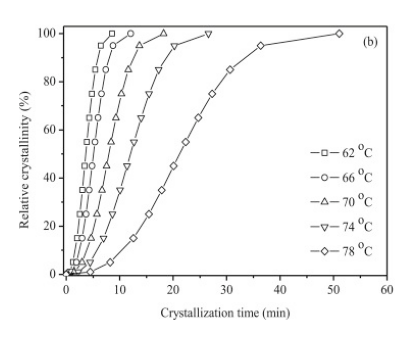

In [2]:
fig, ax = plt.subplots(figsize=[8,6])
ax.axis(False) #since this is an image, we don't need the x & y axis

# we use matplotlib.imread to read our image file and imshow to display it.
path=r'..\images' # ".." means go back one folder
filename ='crystallization kinetics poly testing 48 2015 p 125.png'
img = mpimg.imread(os.path.join(path, filename)) #matplotlib
ax=plt.imshow(img)

We want to determine if the data follows Avrami Kinetics: $1-X_t = \exp(-k t^n)$ where $X_t$ is the relative crystallinity fraction from 0 to 1.0.  If we take the Ln of both sides and then the log of both sides we get:  $log(-ln(1-xt)) = log(k) + n log(t)$.  To test, let's plot our data as $\log(-ln(1-X_t))$ versus $log(t)$ and see if it is linear according to the equation we just found.  

:::{admonition} Recall    
Recall we studied Avrami kinetics in MSE 2044 Introduction to Materials Engineering.  Specifically, we covered this material in Chapter 10 Phase Transformations in our textbook: William D. Callister Jr., David G. Rethwisch, Materials Science and Engineering: An Introduction, 10th Edition, 2018. ISBN: 978-1-119-40549-8  
:::

If we can get the pixel positions of known values on the image above (for example points along the x & y axes), then we can determine the transformation from pixel coordinates to plot coordinates for the image.  

#### First let's just see if we can get the pixel position of mouse clicks on the image.  

<hr style="height: 3.0px"/>

>To do this we will use **mpl_connect** which will look for "events" and report on them.  In our case the event we want is a "button press" (mouse click) event.  When the mouse is clicked, we call the function "onclick" which we defined below to update the title on our plot.  The click event gives us access to the x & y coordinates of the click through the variables called event.xdata and event.ydata.  So here we go...

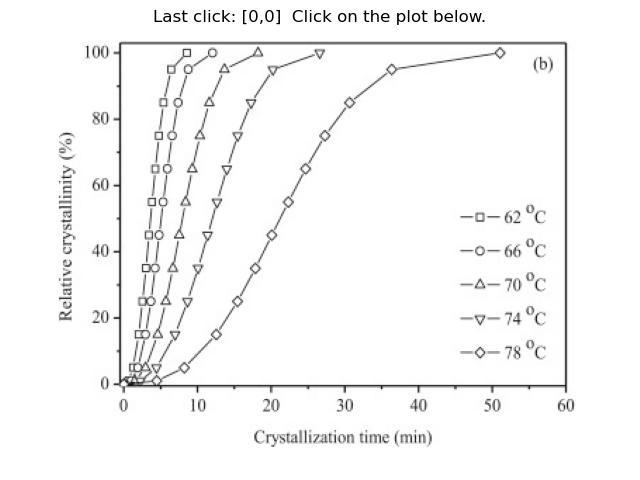

In [3]:
# need to tell matplotlib its output is in the notebook for interactive plotting
%matplotlib widget

fig, ax = plt.subplots()
ax.axis(False)

# we use matplotlib.imread to read our image file and imshow to display it.
path=r'..\images'
filename ='crystallization kinetics poly testing 48 2015 p 125.png'
img = mpimg.imread(os.path.join(path, filename)) #matplotlib
ax=plt.imshow(img)
fig.tight_layout()
fig.suptitle(f'Last click: [0,0]  Click on the plot below.') #initializing the figure title (super title)

# here we define a function that we called "onclick" that changes the title when an "event" happens
def onclick(event):
    fig.suptitle(f'Last click: [{event.xdata:.1f}, {event.ydata:.1f}]') #button press event returns the xdata and ydata of the mouse position

# here we define the "event" as a button press and then call our function "onclick"

fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()


Clicking on a few points in the above plot, what did you notice?  The y-coordinates don't seem right.  The origin is located in the upper left corner rather than the lower left.  We will have to fix this.

#### Now let's collect all those button clicks in a variable called "positions" and fix the y-axis. 

<hr style="height: 3.0px"/>

>We can do this by initializing our variable "positions" and then adding **.append** to our "onclick" function to append each click to "positions."  We fix the y-axis by simply subtracting each y value by the total number of pixels of our image in the y direction (**img.shape[0]**)

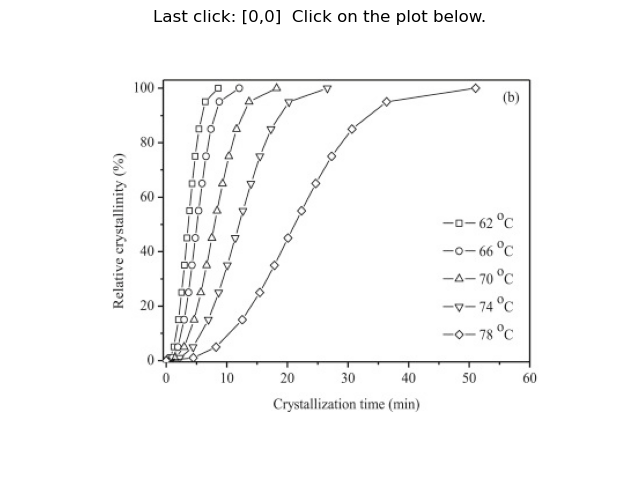

In [4]:
%matplotlib widget

fig, ax = plt.subplots()
ax.axis(False)

path=r'../images'
filename ='crystallization kinetics poly testing 48 2015 p 125.png'
img = mpimg.imread(os.path.join(path, filename)) 
ax=plt.imshow(img)

ydim=img.shape[0] # remember from the previous lesson that the image origin is in the 
    # upper left corner we need to place it in the lower left corner

fig.suptitle(f'Last click: [0,0]  Click on the plot below.')

positions=[] #initialize our variable
def onclick(event):
    fig.suptitle(f'Last click: [{event.xdata:.1f}, {ydim-event.ydata:.1f}]') 
    positions.append([event.xdata,ydim-event.ydata]) #append each click to the list "positions"

fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [5]:
# execute only after clicking on the plot above
positions

[[266.0915199709145, 274.68367724397996],
 [191.63264551204003, 216.3039598341112],
 [157.86641174580626, 153.10049663064797],
 [117.17377105316554, 81.23902476917613]]

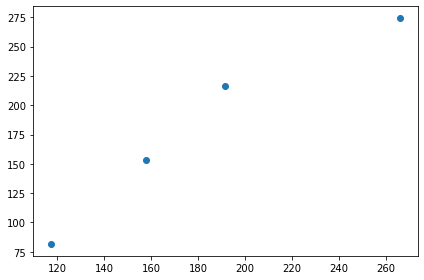

In [6]:
%matplotlib inline

xdata=np.array(positions)[:,0]
ydata=np.array(positions)[:,1]
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
fig.tight_layout()

#### It's working!  So Let's get a bit fancier and include the scatter plot in our "onclick" function so we can see the plot develop as we select points.   

<hr style="height: 3.0px"/>

1. Change subplots to include 1 row and 2 columns (for two plots)
2. Set labels on the x and y axes
3. Add the scatter plot to our "onclick" function so the plot updates on every click

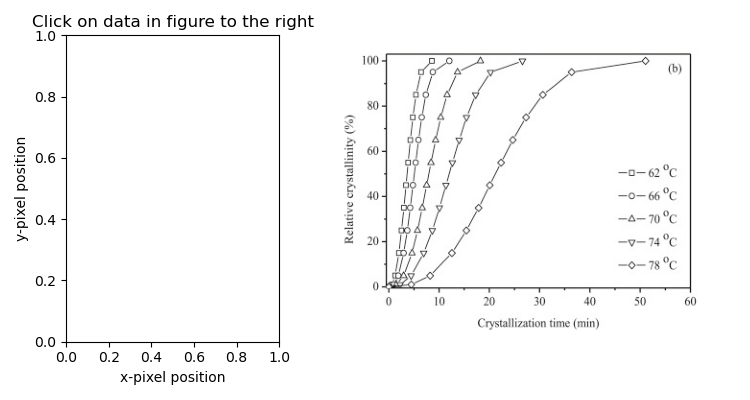

In [7]:
%matplotlib widget

#now we have 1 row and 2 columns i.e. 2 figures in a row
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(7.5, 4), gridspec_kw={'width_ratios': [1, 2]})
ax2.axis(False)

# we use matplotlib.imread to read our image file and imshow to display it.
path=r'..\images'
filename ='crystallization kinetics poly testing 48 2015 p 125.png'
img = mpimg.imread(os.path.join(path, filename)) 
ax2=plt.imshow(img)
#notice above we asigned the image to ax2 which is the image on the right

# recall from part 1 that image files have coord in left top corner so we need to correct by the y-dimension of the file
ydim=img.shape[0]

# setting title and labels for ax1 (figure on the left)
ax1.set_title('Click on data in figure to the right')
ax1.set_xlabel('x-pixel position')
ax1.set_ylabel('y-pixel position')

pos = []
def onclick(event):
    pos.append([event.xdata,ydim-event.ydata])
    ax1.set_title(f'Last click: [{event.xdata:.1f}, {ydim-event.ydata:.1f}]')
    ax1.scatter(event.xdata, ydim-event.ydata,marker='o', c='r', edgecolor='b') #adding scatter plot
    
fig.canvas.mpl_connect('button_press_event', onclick) 
fig.tight_layout()
plt.show()

#### We stored our data this time in variable "pos"

In [8]:
pos

[[189.0634325891508, 293.0590063321622],
 [153.5530064785434, 257.5485802215548],
 [119.08700466530678, 163.55039345818219],
 [104.46506450211552, 89.39626834485492]]

The problem with the data above is that it is units of pixels and not minutes and relative crystallinity so we need to transform this data into the units of our plot using a method similar to what is used in crystallography using the transformation matrix.  

The general formula will be $m \cdot \ (pixel\ coord - \text{pixel offset}) = plot\ values$ where $m$ is the transformation matrix.  

$$\begin{bmatrix}m11 & m12 \\m21 & m22 \end{bmatrix}\cdot \left( \left[\begin{array}{c}pixX\\ pixY\end{array}\right] - \left[\begin{array}{c}Ox\\ Oy\end{array}\right]\right)=\left[\begin{array}{c}Xvalue\\ Yvalue\end{array}\right]$$

We just need three known pixel coordinates, $(pixX1, pixY1)$,$(pixX2, pixY2)$,$(pixX3,pixY3)$ and their corresponding plot coordinates, $(X1,Y1)$,$(X2,Y2)$,$(X3,Y3)$ to solve for our unknowns: *m11, m12, m21, m22, Ox, Oy*.  

It is most convenient to pick our known coordinates from the x and y axes for example, (1) a point along the x-axis, (2) the plot origin, and (3) one point along the y-axis as shown below.  

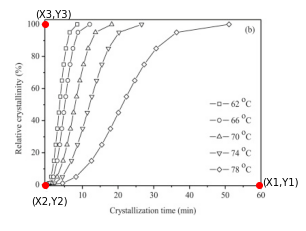

In [127]:
%matplotlib inline
path=r'..\images'
filename ='crystallization kinetics poly testing 48 2015 p 125.png'
img = mpimg.imread(os.path.join(path, filename)) 
fig=plt.imshow(img)
ydim=img.shape[0]

plt.plot([370,55,55], np.array([262,25.3,263]),'ro')
plt.text(375,262, "(X1,Y1)")
plt.text(40,15, "(X3,Y3)")
plt.text(35,290, "(X2,Y2)", backgroundcolor='white')
plt.axis(False)
plt.show()

#### from the plot above the three points I chose are:  
1. (60 min, 0 %)
2. (0 min, 0 %)
3. (0 min, 100 %)

#### and the corresponding pixel coordinates for these three are:  
1. (371.6, 59.1)
2. (56.1, 60.2)
3. (55.1, 296.2)

Using these three points, we get 3 sets of two equations (one for x and one for y) for a total of 6 equations.  

In [153]:
from sympy import solve, Eq, symbols, Matrix

(m11, m12, m21, m22, Ox, Oy) = symbols('m11, m12, m21, m22, Ox, Oy')
(pix_X1,pix_Y1,pix_X2,pix_Y2,pix_X3,pix_Y3) = symbols('pix_X1,pix_Y1,pix_X2,pix_Y2,pix_X3,pix_Y3')
(X1,Y1,X2,Y2,X3,Y3) = symbols('X1,Y1,X2,Y2,X3,Y3')

In [171]:
display(Eq(m*(sym.Matrix([pix_X1,pix_Y1])-offset),sym.Matrix([X1, Y1])).subs([(pix_X1,371.6),(pix_Y1,59.1),(X1,60),(Y1,0)]))
display(Eq(m*(sym.Matrix([pix_X2, pix_Y2])-offset),sym.Matrix([X2, Y2])).subs([(pix_X2,56.1),(pix_Y2,60.2),(X2,0),(Y2,0)]))
display(Eq(m*(sym.Matrix([pix_X3, pix_Y3])-offset),sym.Matrix([X3, Y3])).subs([(pix_X3,55.1),(pix_Y3,296.2),(X3,0),(Y3,100)]))

Eq(Matrix([
[m11*(371.6 - Ox) + m12*(59.1 - Oy)],
[m21*(371.6 - Ox) + m22*(59.1 - Oy)]]), Matrix([
[60],
[ 0]]))

Eq(Matrix([
[m11*(56.1 - Ox) + m12*(60.2 - Oy)],
[m21*(56.1 - Ox) + m22*(60.2 - Oy)]]), Matrix([
[0],
[0]]))

Eq(Matrix([
[m11*(55.1 - Ox) + m12*(296.2 - Oy)],
[m21*(55.1 - Ox) + m22*(296.2 - Oy)]]), Matrix([
[  0],
[100]]))

To solve equations that contain variables (symbols), we need to import sympy (symbolic python)

In [188]:
from sympy import solve, Eq, symbols, Matrix

In [167]:
# define the symbols in our equations
m11, m12, m21, m22, Ox, Oy = symbols('m11, m12, m21, m22, Ox, Oy')
# define transformation matrix and offset matrix
m = Matrix([[m11, m12],[m21, m22]])
offset=Matrix([Ox,Oy])

In [174]:
# define our 3 sets of equations

eq1=Eq(m*(sym.Matrix([371.6, 59.1])-offset),sym.Matrix([60, 0]))

eq2=Eq(m*(sym.Matrix([56.1, 60.2])-offset),sym.Matrix([0, 0]))

eq3=Eq(m*(sym.Matrix([55.1, 296.2])-offset),sym.Matrix([0,100]))

# solve for matrix, m, and vector, O
print('\n Our solution: ')
sol=solve([eq1,eq2,eq3])
sol


 Our solution: 


[{Ox: 56.1000000000000,
  Oy: 60.2000000000000,
  m11: 0.190177136034404,
  m12: 0.000805835322179677,
  m21: 0.00147736475732941,
  m22: 0.423735073579480}]

Now if we take any pixel point on the image we can convert it to real coordinates.  For example, the second to last point on the right most curve in our image is: (249.355, 283.689)

Our solution printed above is called a dictionary (actually sol[0] is the dictionary. The form above has an extra set of brackets, [ ]).  It has the form {key1: value1, key2:value2, etc}. To use our solution we use sympy to substitute these values for the given symbol ("key").  

In [197]:
print('The matrix, m, is:')
display(m.subs(sol[0]))
print('The offset vector is:')
display(offset.subs(sol[0]))

The matrix, m, is:


Matrix([
[  0.190177136034404, 0.000805835322179677],
[0.00147736475732941,     0.42373507357948]])

The offset vector is:


Matrix([
[56.1],
[60.2]])

In [199]:
# define variables m_cal and offset_cal
m_cal=m.subs(sol[0]) # get the calibrated transformation matrix, m_cal
offset_cal=offset.subs(sol[0]) # get the calibrated offset, offset_cal

Now that we know, m_cal and offset_cal, we can take any pixel coordinate, (pixX,pixY), from the plot and convert it directly to plot coordinates, (Xvalue,Yvalue) by substitution into:   

$$\left[\begin{array}{c}Xplot\\ Yplot\end{array}\right]=\begin{bmatrix}0.1902 & 0.0008058 \\0.0014774 & 0.42374 \end{bmatrix}\cdot \left( \left[\begin{array}{c}pixX\\ pixY\end{array}\right] - \left[\begin{array}{c}56.1\\ 60.2\end{array}\right]\right)$$



In [209]:
# converts pixels position to plot coordinates using the calibration above
def conv(pix_coords, m_cal, offset_cal):
    return(list(m_cal*(Matrix(pix_coords)-offset_cal)))

# test it: recall that plot point (60,0) had pix coord of (371.6,59.1)
# so placing (371.6,59.1) into our function conv() should give us (60,0)
conv([371.6, 59.1], m_cal, offset_cal)

[60.0000000000000, -6.10622663543836e-16]

Looks good! e-16 is close enough to zero

Let's substitute each point from 'pos' and find all the corresponding plot values. 

In [211]:
plot_data=[conv(pixel_point, m_cal, offset_cal) for pixel_point in pos]
plot_data

[[25.4742508194983, 98.8669636711242],
 [18.6923641267561, 83.7674887982537],
 [12.0619715522434, 43.8862413573333],
 [9.22145683543966, 12.4429357571347]]

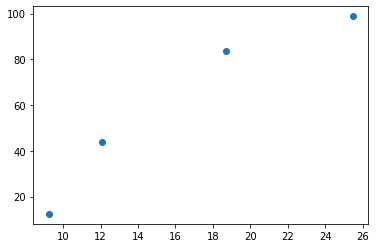

In [212]:
# plot our converted data
xdata=np.array(plot_data)[:,0]
ydata=np.array(plot_data)[:,1]
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
plt.show()

### Let's compare to the original image

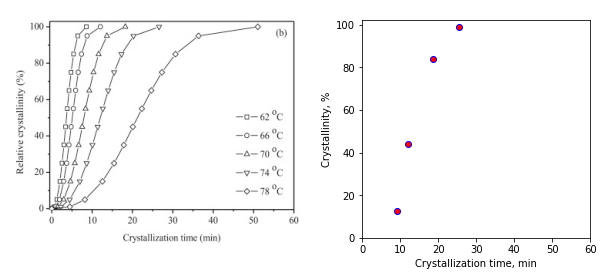

In [213]:
%matplotlib inline

#now we have 1 row and 2 columns i.e. 2 figures in a row
fig3_1, (ax3_1, ax3_2) = plt.subplots(nrows=1, ncols=2,figsize=(9, 4))

ax3_1.clear()
ax3_2.clear()

#set the scatter plot for axes 3_2 i.e. the right plot
ax3_2.scatter(np.array(plot_data)[:,0],np.array(plot_data)[:,1],marker='o', c='r', edgecolor='b');
ax3_2.set_xlabel('Crystallization time, min')
ax3_2.set_ylabel('Crystallinity, %');
ax3_2.set_xlim(0,60)
ax3_2.set_ylim(0,102)

# turn off the x, y axis on the image - the axis doesn't make sense for an image
ax3_1.axis(False)

# we use matplotlib.imread to read our image file and imshow to display it.
path=r'..\images'
filename ='crystallization kinetics poly testing 48 2015 p 125.png'
img2 = mpimg.imread(os.path.join(path, filename)) 

# This is the better way to display images along with normal plots
# You have to use the .add_axes function to place the image in your figure
# The image could even overlap another plot if you want. Play with the numbers to see what happens
# .add_axes([left, bottom, width, height]) all values are fractions of the overall figure size
# zorder allows you to place images in front of other images or plots.  0 = place behind, 10 = in front
image_axis = fig3_1.add_axes([0, 0, 0.47, 1], zorder=10, anchor=(0.5,0.5)) #zorder places figure on top of anything else in axes
image_axis.imshow(img2)
image_axis.axis('off')
 
plt.show()